# Feature Selection



In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import catboost 
from catboost import Pool
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from copy import deepcopy

from bartpy.sklearnmodel import SklearnModel
from bartpy.diagnostics.features import *

%matplotlib inline

In [3]:
model = SklearnModel(n_samples=1000, n_burn=50, n_trees=50, store_in_sample_predictions=False)

# Two Features - one important

Text(0.5,1,'X v y')

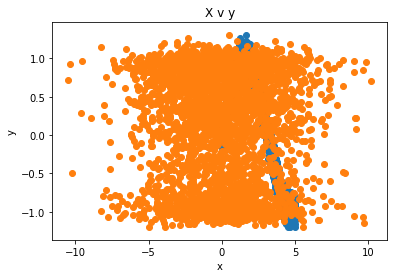

In [9]:
x = np.linspace(0, 5, 3000)
X = np.random.normal(0, 3, size = 3000 * 2).reshape(3000, 2)
X[:, 0] = x
X = pd.DataFrame(X).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 1], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

## Create a benchmark null distribution

To identify whether features are important, we need a baseline "null" distribution to compare the inclusion proportions to.  To do this, we create a set of data where the target variable is randomly permuted to remove any relationship between the covariates and the target

In [ ]:
null_distributions = null_feature_split_proportions_distribution(model, X, y, n_permutations=10)

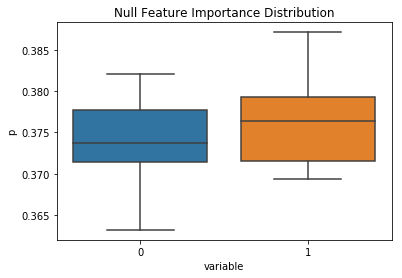

In [118]:
plot_null_feature_importance_distributions(null_distributions)

In [106]:
thresholds = local_thresholds(null_distributions, 0.95) 

## Fit BartPy to the true data

In [95]:
model.fit(X, y)

SklearnModel(alpha=0.95, beta=2.0, n_burn=50, n_chains=4, n_jobs=4,
       n_samples=1000, n_trees=50, p_grow=0.5, p_prune=0.5, sigma_a=0.001,
       sigma_b=0.001, store_in_sample_predictions=False, thin=0.1)

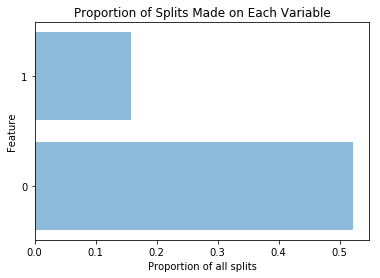

In [110]:
proportions = feature_split_proportions_counter(model.model_samples)
plot_feature_split_proportions(model.model_samples)

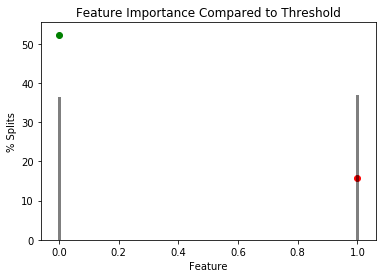

In [115]:
plot_feature_proportions_against_thresholds(proportions, thresholds)

In [117]:
final_features = kept_features(proportions, thresholds)
final_features

[0]